In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/50-startups/50_Startups.csv


## ***Buisness Case :***
 - Predict the **Profit** earned by a startup based on its **R&D Spend, Administration costs, Marketing Spend**, and **State**.

  ---
###   Objective :
   Help startups and investors estimate future profits by analyzing how much they spend on key areas like R&D, Marketing, and Administration.    This can guide better budgeting and strategic decisions.

  ---
### Input Features :

 - R&D Spend

 - Administration Spend

 - Marketing Spend

 - State (Location)

  ---
### Target :

   Profit

## ***Domain Analysis :***
**Domain:**
Business Analytics / Startup Investment

 ---
### Problem Statement :
 Startups are early-stage companies aiming for growth through innovation and market capture.
 Startups spend money on R&D, marketing, and administrative activities, but profits can vary widely. Predicting profit based on these expenditures can help companies make smarter financial decisions, optimize budgets, and improve investor confidence.

 ---
### Data Columns :
- **R&D Spend:** Investment in research and product innovation.

- **Administration Spend:** Salaries, legal, and office-related costs.

- **Marketing Spend:** Advertising, brand-building, and customer acquisition costs.

- **State:** The location where the startup is based, which can impact costs and market access.

- **Profit:** The net financial gain after subtracting all expenses.

## Import Libraries.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## E.D.A

In [4]:
data = pd.read_csv('/kaggle/input/50-startups/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
data.size

250

In [6]:
data.shape

(50, 5)

In [7]:
data.ndim

2

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
data.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

1. Marketing Spread distribution has more spread compared to others.
2. Some startups have spend 0 dollars in R&D Spend and Marketing Spend.

## Visual Analysis.

<Axes: xlabel='State', ylabel='count'>

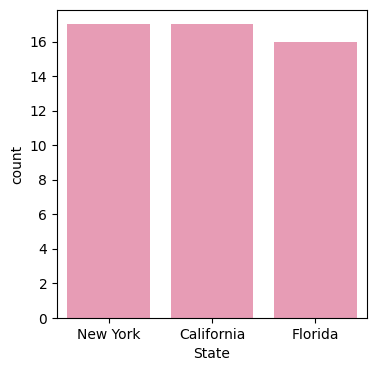

In [24]:
plt.figure(figsize=(4,4))
sns.countplot(x='State', data=data, color='#F48FB1')

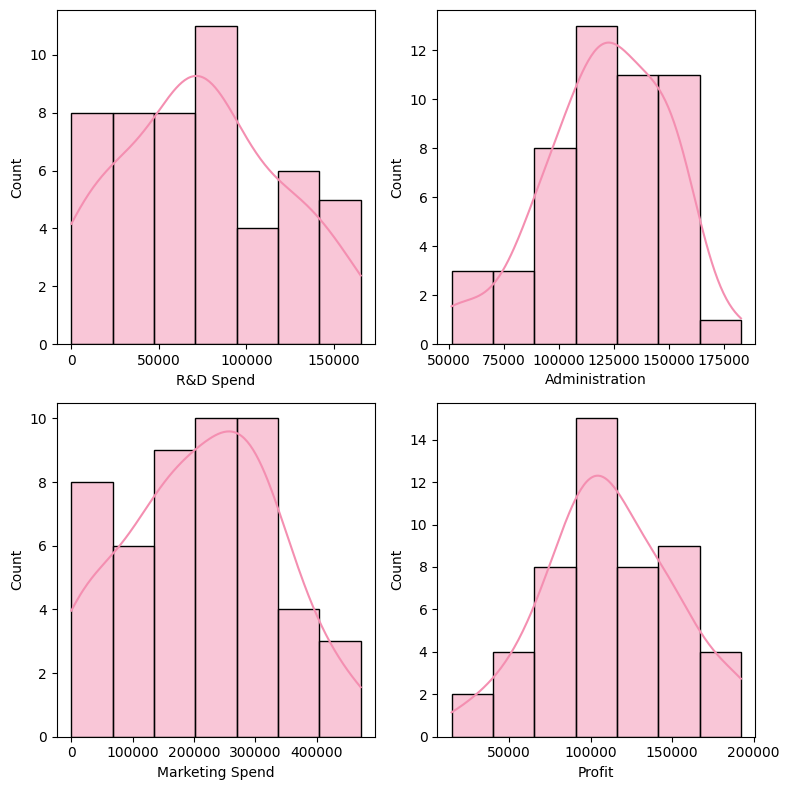

In [12]:
col = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
plt.figure(figsize=(8,8))
plotnumber=1
for column in col:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(data[column], kde=True, color='#F48FB1')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

In [13]:
data.State.value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

<Figure size 400x400 with 0 Axes>

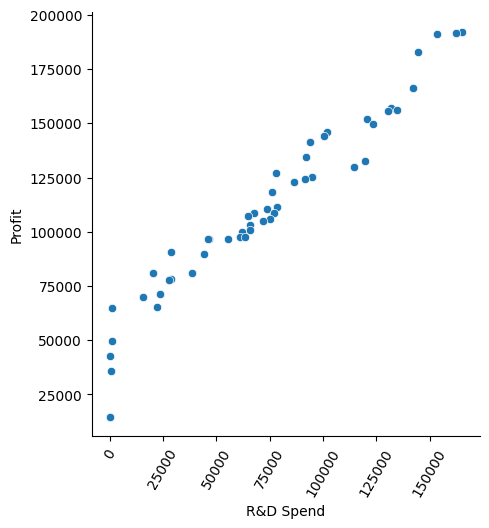

In [16]:
plt.figure(figsize=(4,4))
sns.relplot(x='R&D Spend', y='Profit', data=data)
plt.xticks(rotation=60);

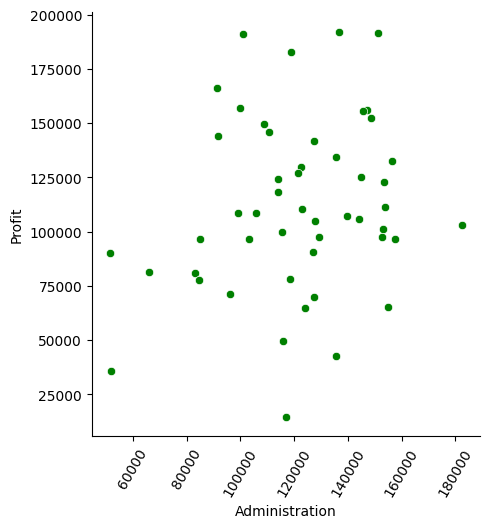

In [17]:
sns.relplot(x='Administration', y='Profit', data=data, color='g')
plt.xticks(rotation=60);

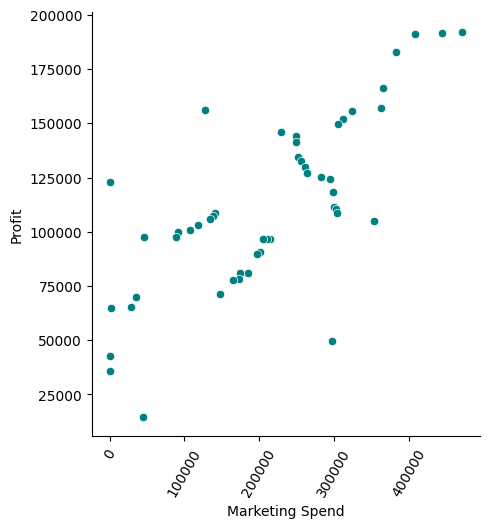

In [19]:
sns.relplot(x='Marketing Spend', y='Profit', data=data, color='teal')
plt.xticks(rotation=60);

<Axes: xlabel='State', ylabel='Profit'>

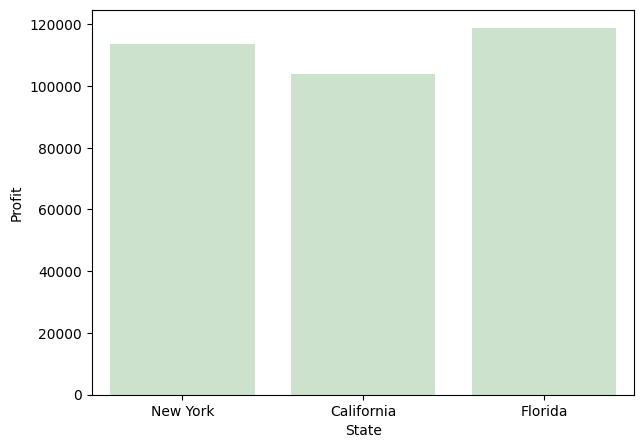

In [23]:
plt.figure(figsize=(7,5))
sns.barplot(x='State', y='Profit', data=data, color='#C8E6C9', errorbar=None)

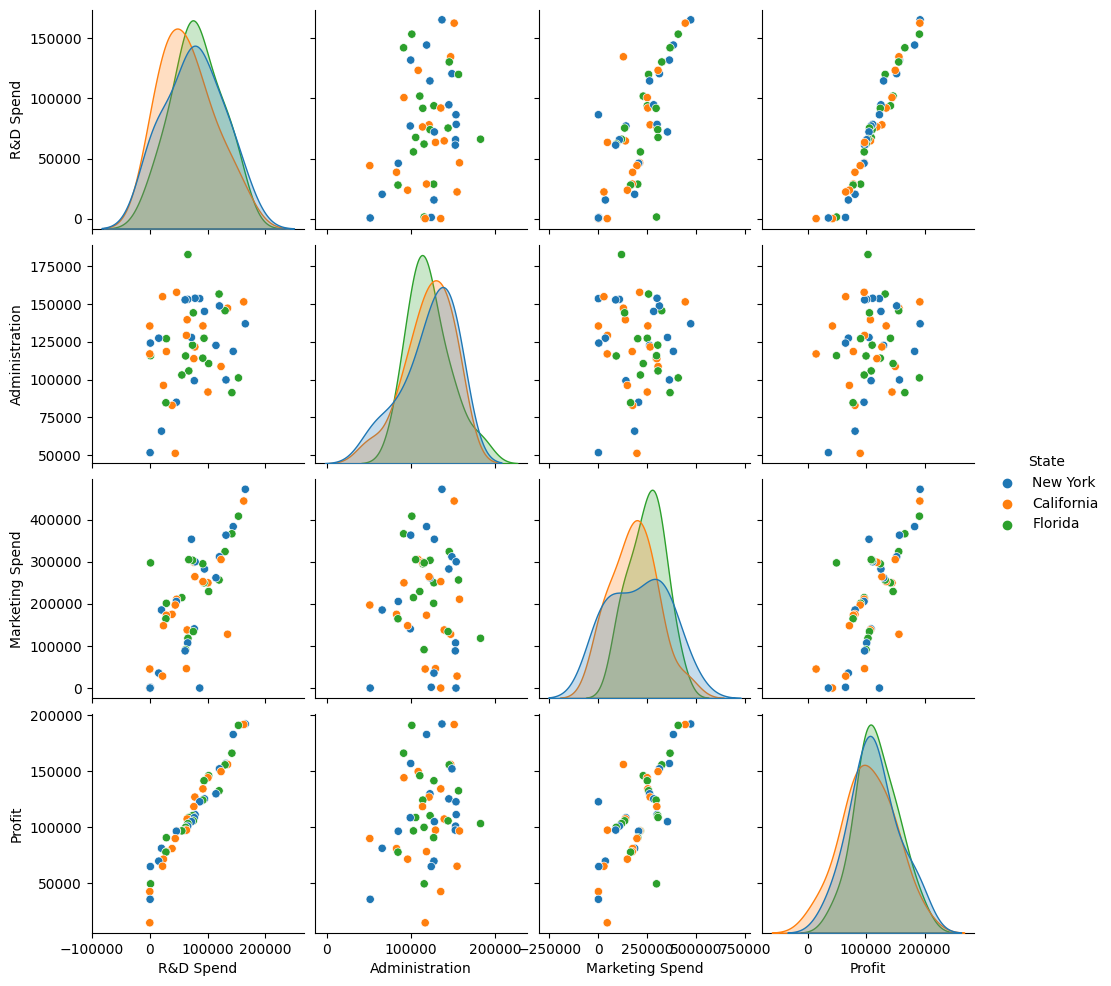

In [25]:
sns.pairplot(data, hue='State')

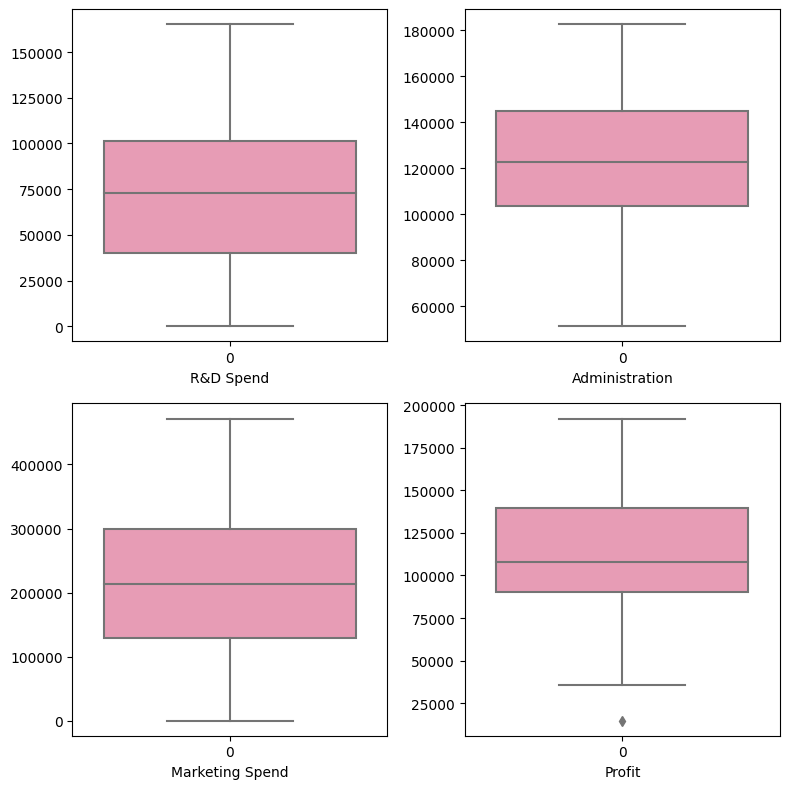

In [26]:
col = ['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
plt.figure(figsize=(8,8))
plotnumber=1
for column in col:
    ax = plt.subplot(2,2,plotnumber)
    sns.boxplot(data[column], color='#F48FB1')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()

<Axes: xlabel='State', ylabel='Profit'>

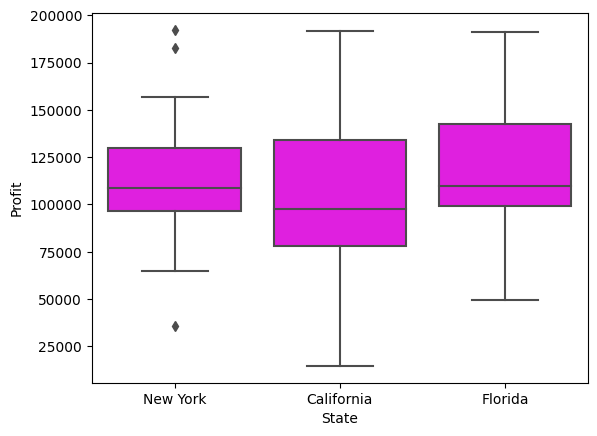

In [27]:
sns.boxplot(x='State', y='Profit', data=data, color='Magenta')

In [28]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [29]:
data.drop('State', axis=1).corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<Axes: >

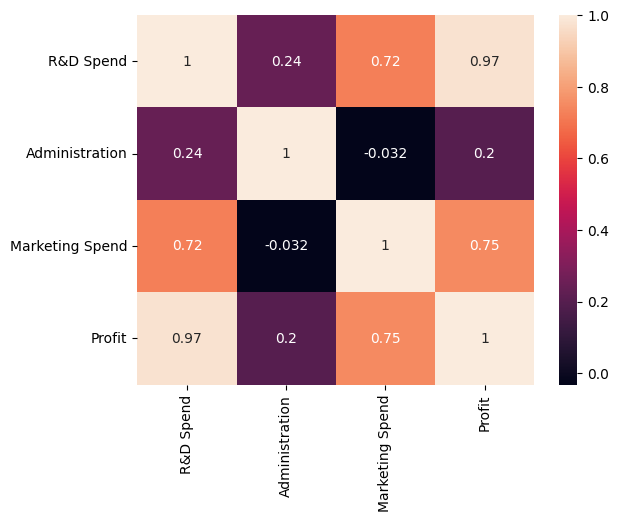

In [30]:
sns.heatmap(data.drop('State', axis=1).corr(), annot=True)

## Model

- ### MODEL 1
*1st method-: without using state column.*

In [31]:
X = data[['R&D Spend','Administration','Marketing Spend']]
y = data.Profit

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [34]:
y_predict = LR.predict(X_test)
y_predict # predicted by model

array([126703.02716461,  84894.75081556,  98893.41815974,  46501.70815036,
       129128.39734381,  50992.69486261, 109016.5536578 , 100878.4641454 ,
        97700.59638629, 113106.15292226])

In [35]:
# Evaluation.
print('R2 Score:',r2_score(y_test,y_predict))
adjusted_r2 = 1-((1-0.9)*(10-1)/(10-3-1))
print('Adjusted R2 Score:',adjusted_r2)
print('mean_squared_error:',mean_squared_error(y_test,y_predict))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(y_test,y_predict)))
print('mean_absolute_error:',mean_absolute_error(y_test,y_predict))


R2 Score: 0.900065308303732
Adjusted R2 Score: 0.8500000000000001
mean_squared_error: 80926321.22295167
root_mean_squared_error: 8995.90580336142
mean_absolute_error: 6979.152252370404


- ### MODEL 2
*1st method-: using state column.*

In [41]:
df_dummy = pd.get_dummies(data["State"], dtype=int)
df=pd.concat([data,df_dummy] , axis=1)
df=df.drop(['State','California'], axis=1)
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,Florida,New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0


In [46]:
x = df.drop('Profit', axis=1)
Y = df.Profit
x_train,x_test,Y_train,Y_test = train_test_split(x, Y, test_size=0.3, random_state=42)

In [47]:
Lr = LinearRegression()
Lr.fit(x_train,Y_train)

LinearRegression()

In [48]:
Y_predict=Lr.predict(x_test)

In [49]:
# Evaluation.
print('R2 Score:',r2_score(Y_test,Y_predict))

print('mean_squared_error:',mean_squared_error(Y_test,Y_predict))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,Y_predict)))
print('mean_absolute_error:',mean_absolute_error(Y_test,Y_predict))

R2 Score: 0.93971080633682
mean_squared_error: 84826955.03358746
root_mean_squared_error: 9210.154995090335
mean_absolute_error: 7395.433531431923


### Which model good with state or without.
The model with:

- Lower MAE, MSE, RMSE
- Higher R² score

is the better model.

so MODEL 2 IS BETTER (WITH STATE)